In [51]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# 37)

In [52]:
x_indoor = np.array(
    [
        0.07,
        0.08,
        0.09,
        0.12,
        0.12,
        0.12,
        0.13,
        0.14,
        0.15,
        0.15,
        0.17,
        0.17,
        0.18,
        0.18,
        0.18,
        0.18,
        0.19,
        0.2,
        0.22,
        0.22,
        0.23,
        0.23,
        0.25,
        0.26,
        0.28,
        0.28,
        0.29,
        0.34,
        0.39,
        0.4,
        0.45,
        0.54,
        0.62,
    ]
)
x_outdoor = np.array(
    [
        0.29,
        0.68,
        0.47,
        0.54,
        0.97,
        0.35,
        0.49,
        0.84,
        0.86,
        0.28,
        0.32,
        0.32,
        1.55,
        0.66,
        0.29,
        0.21,
        1.02,
        1.59,
        0.9,
        0.52,
        0.12,
        0.54,
        0.88,
        0.49,
        1.24,
        0.48,
        0.27,
        0.37,
        1.26,
        0.7,
        0.76,
        0.99,
        0.36,
    ]
)


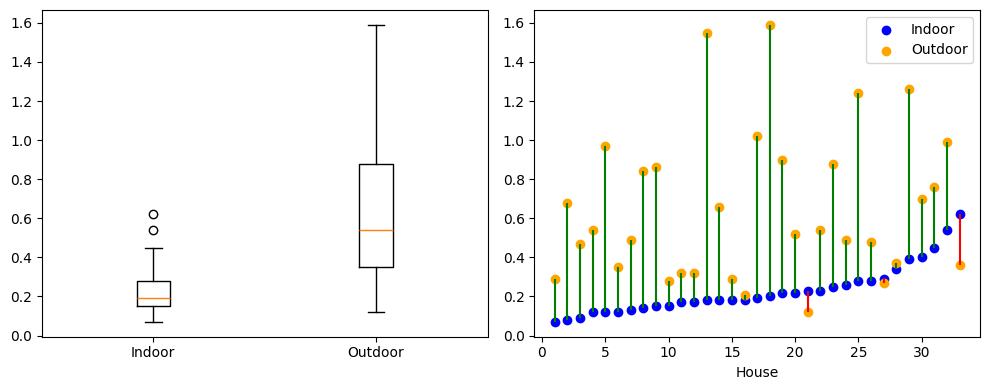

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].boxplot([x_indoor, x_outdoor], tick_labels=["Indoor", "Outdoor"])

axs[1].scatter(np.arange(1, 34), x_indoor, label="Indoor", color="blue")
axs[1].scatter(np.arange(1, 34), x_outdoor, label="Outdoor", color="orange")

for house_num, (indoor, outdoor) in enumerate(zip(x_indoor, x_outdoor), start=1):
    lower, upper, color = (
        (indoor, outdoor, "green") if indoor < outdoor else (outdoor, indoor, "red")
    )

    axs[1].vlines(house_num, lower, upper, color=color)

axs[1].set_xlabel("House")

plt.legend()

plt.tight_layout()
plt.show()

In [54]:
d = x_indoor - x_outdoor
t_val = -t.ppf(0.025, df=len(d) - 1)

(
    round(float(d.mean() - t_val * d.std(ddof=1) / np.sqrt(len(d))), 3),
    round(float(d.mean() + t_val * d.std(ddof=1) / np.sqrt(len(d))), 3),
)

(-0.561, -0.287)